## Spotify Song-Album Popularity Neural Network Models

This notebook performs exploratory data analysis on the Spotify data.

In [1]:
import random
random.seed(109)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale

import tensorflow as tf

%matplotlib inline

import seaborn as sns
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

In [3]:
# Import the data
full_data = pd.read_csv('data/final_spotify_data.csv')
train = pd.read_csv('data/training.csv')
test = pd.read_csv('data/testing.csv')

In [5]:
# Regularize
# Create a scaler
scaler = MinMaxScaler(feature_range=(-1,1))

# Fit scaler on data
no_id_train = train.drop(['track_id', 'album_id', 'track_pop', 'album_pop'], axis=1)
no_id_test = test.drop(['track_id', 'album_id', 'track_pop', 'album_pop'], axis=1)
scaler.fit(no_id_train)

# Apply transform
normalized_train = scaler.transform(no_id_train)
normalized_test = scaler.transform(no_id_test)

# Separate the features from the response
X_train = normalized_train[:, :-1]
y_train = normalized_train[:, -1]

X_test = normalized_test[:, :-1]
y_test = normalized_test[:, -1]

In [7]:
# Build the preliminary model
prelim_model = tf.keras.models.Sequential(name="preliminary")

# Input Layer
prelim_model.add(tf.keras.layers.Flatten(input_shape=(13,)))

# Hidden Layers
prelim_model.add(tf.keras.layers.Dense(100, kernel_initializer='normal', activation='relu'))
prelim_model.add(tf.keras.layers.Dense(100, kernel_initializer='normal', activation='relu'))
prelim_model.add(tf.keras.layers.Dense(100, kernel_initializer='normal', activation='relu'))

# Output Layer
prelim_model.add(tf.keras.layers.Dense(1, kernel_initializer='normal', activation='linear'))

In [8]:
# Compile the model 
prelim_model.compile(loss='mean_squared_error', 
                     optimzer='adam')
prelim_model.summary()

Model: "preliminary"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 13)                0         
_________________________________________________________________
dense (Dense)                (None, 100)               1400      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 21,701
Trainable params: 21,701
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Fit the model
prelim_history = prelim_model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=500, verbose=0)

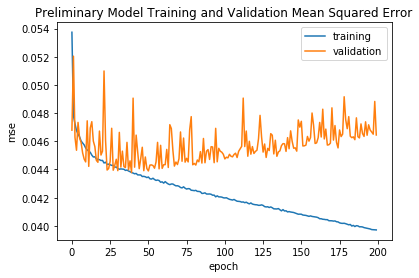

In [28]:
# Plot training and validation accuracy 
plt.plot(prelim_history.history['loss'], label='training')
plt.plot(prelim_history.history['val_loss'], label='validation')
plt.title('Preliminary Model Training and Validation Mean Squared Error')
plt.xlabel('epoch')
plt.ylabel('mse')
plt.legend()
plt.savefig('images/nn_model1_perf.png', bbox_inches='tight')
plt.show()

In [22]:
# Build the secondary model, with regularization
model2 = tf.keras.models.Sequential(name="second")

# Input Layer
model2.add(tf.keras.layers.Flatten(input_shape=(13,)))

# Hidden Layers
model2.add(tf.keras.layers.Dense(100, kernel_initializer='normal', activation='relu'))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Dropout(0.1))
model2.add(tf.keras.layers.Dense(100, kernel_initializer='normal', activation='relu'))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Dropout(0.3))
model2.add(tf.keras.layers.Dense(100, kernel_initializer='normal', activation='relu'))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Dropout(0.2))

# Output Layer
model2.add(tf.keras.layers.Dense(1, kernel_initializer='normal', activation='linear'))

In [23]:
# Compile the model 
model2.compile(loss='mean_squared_error', optimzer='adam')
model2.summary()

Model: "second"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 13)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               1400      
_________________________________________________________________
batch_normalization_6 (Batch (None, 100)               400       
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 100)               10100     
_________________________________________________________________
batch_normalization_7 (Batch (None, 100)               400       
_________________________________________________________________
dropout_7 (Dropout)          (None, 100)               0    

In [24]:
# Fit the model 
model2_history = model2.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=500, verbose=0)

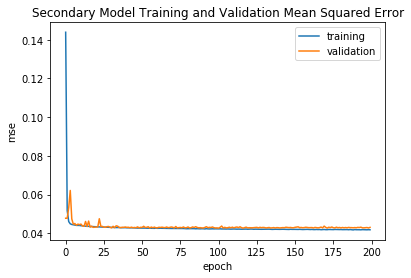

In [27]:
# Plot training and validation accuracy 
plt.plot(model2_history.history['loss'], label='training')
plt.plot(model2_history.history['val_loss'], label='validation')
plt.title('Secondary Model Training and Validation Mean Squared Error')
plt.xlabel('epoch')
plt.ylabel('mse')
plt.legend()
plt.savefig('images/nn_model2_perf.png', bbox_inches='tight')
plt.show()

In [15]:
# Build the tertiary model, with less regularization
model3 = tf.keras.models.Sequential(name="third")

# Input Layer
model3.add(tf.keras.layers.Flatten(input_shape=(13,)))

# Hidden Layers
model3.add(tf.keras.layers.Dense(100, kernel_initializer='normal', activation='relu'))
model3.add(tf.keras.layers.BatchNormalization())
model3.add(tf.keras.layers.Dropout(0.3))
model3.add(tf.keras.layers.Dense(100, kernel_initializer='normal', activation='relu'))
model3.add(tf.keras.layers.BatchNormalization())
model3.add(tf.keras.layers.Dropout(0.4))
model3.add(tf.keras.layers.Dense(100, kernel_initializer='normal', activation='relu'))
model3.add(tf.keras.layers.BatchNormalization())
model3.add(tf.keras.layers.Dropout(0.2))

# Output Layer
model3.add(tf.keras.layers.Dense(1, kernel_initializer='normal', activation='linear'))

In [16]:
# Compile the model 
model3.compile(loss='mean_squared_error', optimzer='adam')
model3.summary()

Model: "third"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 13)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               1400      
_________________________________________________________________
batch_normalization_3 (Batch (None, 100)               400       
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)               10100     
_________________________________________________________________
batch_normalization_4 (Batch (None, 100)               400       
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0     

In [25]:
# Fit the model 
model3_history = model3.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=500, verbose=0)

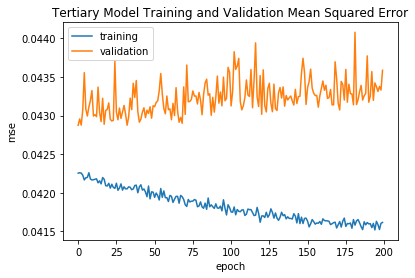

In [29]:
# Plot training and validation accuracy 
plt.plot(model3_history.history['loss'], label='training')
plt.plot(model3_history.history['val_loss'], label='validation')
plt.title('Tertiary Model Training and Validation Mean Squared Error')
plt.xlabel('epoch')
plt.ylabel('mse')
plt.legend()
plt.savefig('images/nn_model3_perf.png', bbox_inches='tight')
plt.show()

### Evaluation on the Test Set

The following illustrate the models' performance on the test set.

In [30]:
# Loss on the test set
training_loss_1 = prelim_model.evaluate(X_train, y_train, verbose=0)
test_loss_1 =  prelim_model.evaluate(X_test, y_test, verbose=0)

training_loss_2 = model2.evaluate(X_train, y_train, verbose=0)
test_loss_2 =  model2.evaluate(X_test, y_test, verbose=0)

training_loss_3 = model3.evaluate(X_train, y_train, verbose=0)
test_loss_3 =  model3.evaluate(X_test, y_test, verbose=0)

In [31]:
print("*** Preliminary Model ***")
print(f"The overall loss on the training set is: {training_loss_1}")
print(f"The overall loss on the test set is: {test_loss_1}")

pct_diff_1 = (test_loss_1 - training_loss_1) / test_loss_1
print(f"The preliminary model performs ~{int(pct_diff_1 * 100)}% worse on the test set than on the training set.")

*** Preliminary Model ***
The overall loss on the training set is: 0.0405881427133216
The overall loss on the test set is: 0.04641240172658307
The preliminary model performs ~12% worse on the test set than on the training set.


In [32]:
print("*** Secondary Model ***")
print(f"The overall loss on the training set is: {training_loss_2}")
print(f"The overall loss on the test set is: {test_loss_2}")

pct_diff_2 = (test_loss_2 - training_loss_2) / test_loss_2
print(f"The secondary model performs ~{int(pct_diff_2 * 100)}% worse on the test set than on the training set.")

*** Secondary Model ***
The overall loss on the training set is: 0.04157951300232058
The overall loss on the test set is: 0.043373048981760406
The secondary model performs ~4% worse on the test set than on the training set.


In [33]:
print("*** Tertiary Model ***")
print(f"The overall loss on the training set is: {training_loss_3}")
print(f"The overall loss on the test set is: {test_loss_3}")

pct_diff_3 = (test_loss_3 - training_loss_3) / test_loss_3
print(f"The preliminary model performs ~{int(pct_diff_3 * 100)}% worse on the test set than on the training set.")

*** Tertiary Model ***
The overall loss on the training set is: 0.041400123363982334
The overall loss on the test set is: 0.04434847397357645
The preliminary model performs ~6% worse on the test set than on the training set.


Of the models above, the preliminary model, with no regularization, seems to perfrom the best on the validation set.

In [34]:
# Serialize model to JSON
model2_json = model2.to_json()
with open("models/neural.json", "w") as json_file:
    json_file.write(model2_json)
    
# Serialize weights to HDF5
model2.save_weights("models/neural.h5")

print("Saved model.")

Saved model.
